In [62]:
# Importing the required libraries
from finvizfinance.screener.overview import Overview
import pandas as pd
import csv
import os

# Define the function to get undervalued stocks
def get_undervalued_stocks():
    """
    Returns a list of tickers with:
    
    - Positive Operating Margin
    - Debt-to-Equity ratio under 1
    - Low P/B (under 1)
    - Low P/E ratio (under 25)
    - Low PEG ratio (under 1)
    - Positive Insider Transactions
    """
    # Create an Overview object
    foverview = Overview()
    
    # Define filters to screen for undervalued stocks
    filters_dict = {'Debt/Equity':'Under 1', 
                    'PEG':'Low (<1)', 
                    'Operating Margin':'Positive (>0%)', 
                    'P/B':'Low (<1)',
                    'P/E':'Under 25',
                    'InsiderTransactions':'Positive (>0%)'}
    
    try:
        # Set filters for the Overview object
        foverview.set_filter(filters_dict=filters_dict)
        
        # Get the screener view data
        df_overview = foverview.screener_view()
        
        # Create 'out' directory if it doesn't exist
        if not os.path.exists('out'):
            os.makedirs('out')
        
        # Save the data to a CSV file
        df_overview.to_csv('out/Overview.csv', index=True)
        
        # Get the tickers from the DataFrame
        tickers = df_overview['Ticker'].tolist()
        
        return tickers
    
    except Exception as e:
        print(f"Error occurred: {e}")
        return None

# Uncomment the following line to print the list of undervalued stocks
print('Todays Undervalued Stock Picks')
print(get_undervalued_stocks())


Todays Undervalued Stock Picks
['AMPY', 'BOOM', 'BWEN', 'BY', 'CAAS', 'CBFV', 'CNOB', 'FNB', 'HAFC', 'MTW', 'OPBK', 'REI', 'SMMF', 'STCN', 'TCBX', 'VTLE', 'WNEB']


C:\Users\benja\Documents\Jupyter\venv\Lib\site-packages\finvizfinance\screener\overview.py:203: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame(frame)], ignore_index=True)


In [63]:
import pandas as pd
from tabulate import tabulate

# Read the CSV file into a DataFrame
overview_df = pd.read_csv('out/Overview.csv')

# Display the DataFrame as a table
print(tabulate(overview_df, headers='keys', tablefmt='pretty'))


+----+------------+--------+---------------------------------+------------------------+-------------------------------------+---------+--------------+-------+-------+---------------------+-----------+
|    | Unnamed: 0 | Ticker |             Company             |         Sector         |              Industry               | Country |  Market Cap  |  P/E  | Price |       Change        |  Volume   |
+----+------------+--------+---------------------------------+------------------------+-------------------------------------+---------+--------------+-------+-------+---------------------+-----------+
| 0  |     0      |  AMPY  |      Amplify Energy Corp.       |         Energy         |            Oil & Gas E&P            |   USA   | 280240000.0  | 0.74  |  7.1  |       0.0187        | 373547.0  |
| 1  |     1      |  BOOM  |         DMC Global Inc          |         Energy         |   Oil & Gas Equipment & Services    |   USA   | 365130000.0  | 17.11 | 18.45 |       -0.0113       | 130531.

In [64]:
# Importing required libraries
from finvizfinance.screener.overview import Overview
from tabulate import tabulate
import pandas as pd
from goose3 import Goose
from requests import get
from transformers import pipeline
from transformers import BertTokenizer, BertForSequenceClassification
import yfinance as yf
import os

# Function to get the sentiment of financial news articles for a given ticker
def get_ticker_news_sentiment(ticker):
    """
    Returns a Pandas dataframe of the given ticker's most recent news article headlines,
    with the overall sentiment of each article.

    Args:
        ticker (string)

    Returns:
        pd.DataFrame: {'Date', 'Article title', Article sentiment', 'ticker symbol'}
    """
    ticker_news = yf.Ticker(ticker)
    news_list = ticker_news.get_news()
    extractor = Goose()
    pipe = pipeline("text-classification", model="yiyanghkust/finbert-tone")

    data = []
    for dic in news_list:
        title = dic['title']
        response = get(dic['link'])
        article = extractor.extract(raw_html=response.content)
        text = article.cleaned_text
        date = article.publish_date
        if len(text) > 2300:
            data.append({'Date': f'{date}',
                         'Article title': f'{title}',
                         'Article sentiment': 'NaN too long',
                         'Ticker': f'{ticker}'
                        })
        else:
            results = pipe(text)
            data.append({'Date': f'{date}',
                         'Article title': f'{title}',
                         'Article sentiment': results[0]['label'],
                         'Ticker': f'{ticker}'
                        })
    df = pd.DataFrame(data)
    return df

# Function to generate CSV file for a given ticker
def generate_csv(ticker):
    df = get_ticker_news_sentiment(ticker)
    print(tabulate(df,headers='keys', tablefmt='pretty'))
    df.to_csv(f'out/{ticker}.csv', index=False)

# Getting undervalued stocks
undervalued = get_undervalued_stocks()

# Generating CSV for each ticker
for ticker in undervalued:
    generate_csv(ticker)

C:\Users\benja\Documents\Jupyter\venv\Lib\site-packages\finvizfinance\screener\overview.py:203: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame(frame)], ignore_index=True)


+---+--------------------------+-----------------------------------------------------------------------------------------------------+-------------------+--------+
|   |           Date           |                                            Article title                                            | Article sentiment | Ticker |
+---+--------------------------+-----------------------------------------------------------------------------------------------------+-------------------+--------+
| 0 |           None           |                    Amplify (AMPY) Denies Any Relation to Oil Sheen in California                    |     Positive      |  AMPY  |
| 1 | 2024-03-11T11:00:00.000Z |                       Amplify Energy Update on Southern California Oil Sheen                        |      Neutral      |  AMPY  |
| 2 |           None           |                      Amplify Energy Statement on Southern California Oil Sheen                      |     Positive      |  AMPY  |
| 3 |           

[*********************100%%**********************]  1 of 1 completed


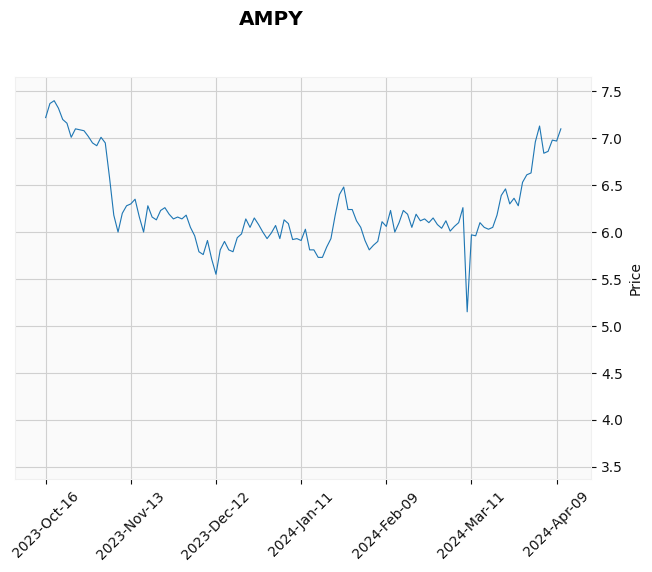

[*********************100%%**********************]  1 of 1 completed


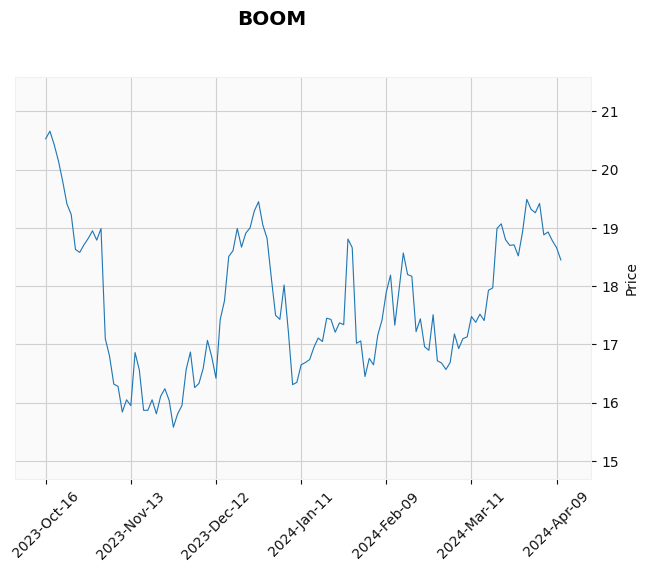

[*********************100%%**********************]  1 of 1 completed


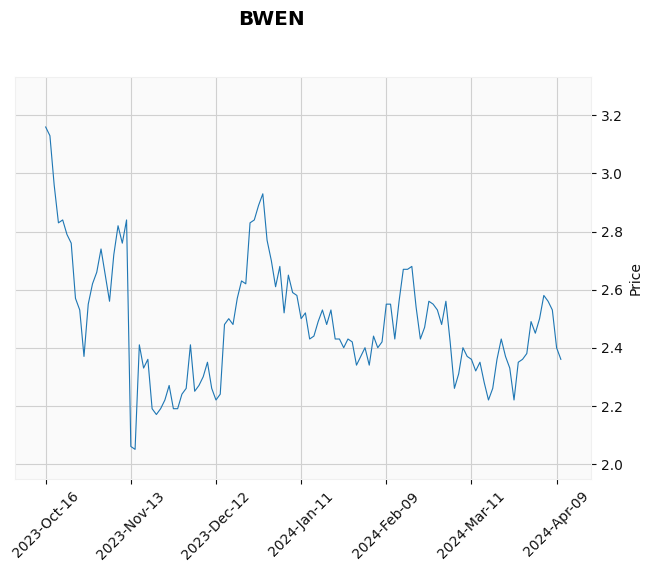

[*********************100%%**********************]  1 of 1 completed


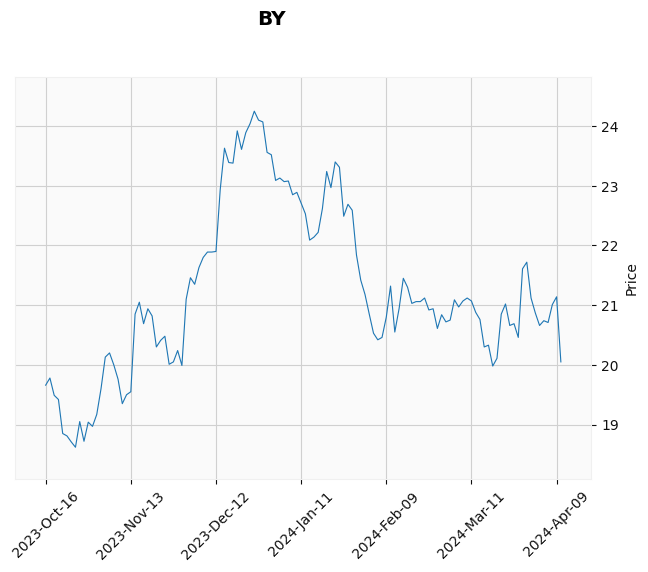

[*********************100%%**********************]  1 of 1 completed


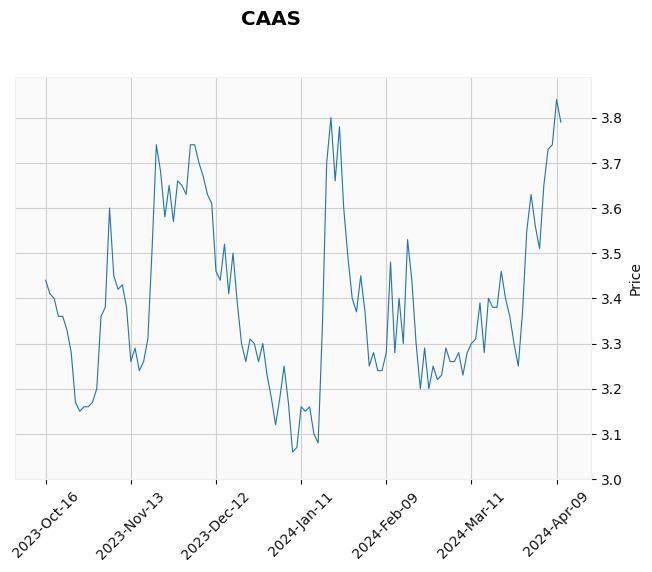

[*********************100%%**********************]  1 of 1 completed


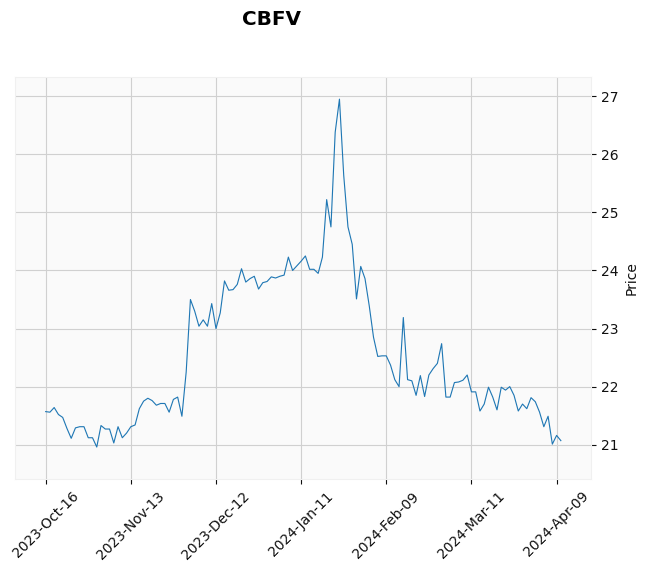

[*********************100%%**********************]  1 of 1 completed


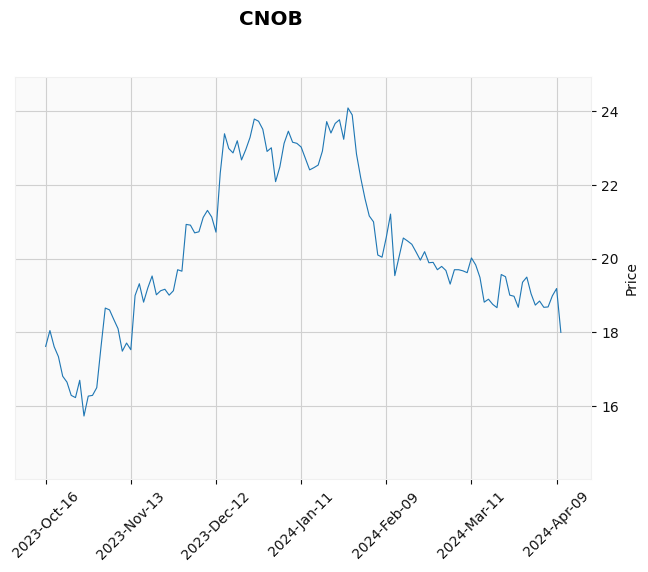

[*********************100%%**********************]  1 of 1 completed


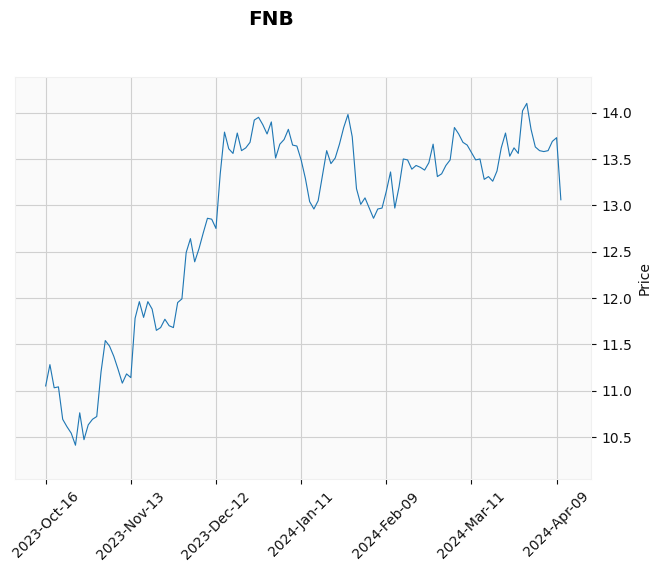

[*********************100%%**********************]  1 of 1 completed


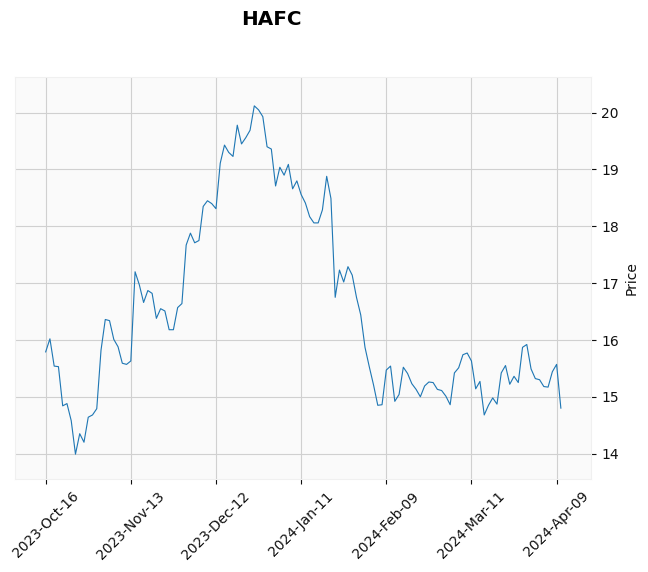

[*********************100%%**********************]  1 of 1 completed


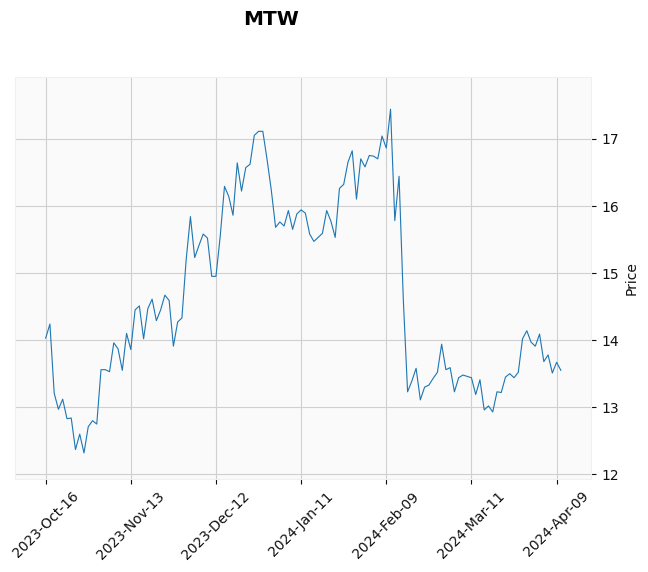

[*********************100%%**********************]  1 of 1 completed


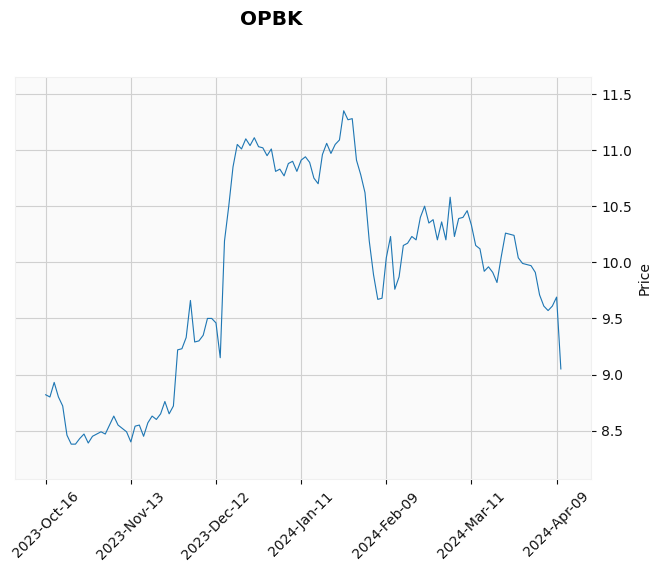

[*********************100%%**********************]  1 of 1 completed


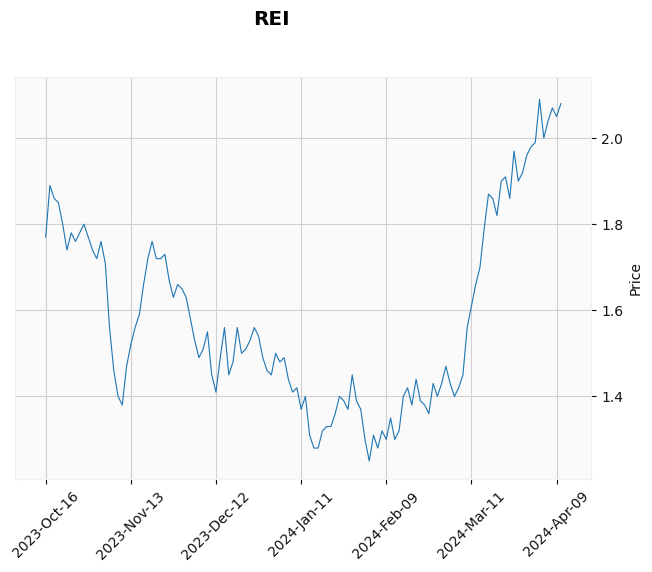

[*********************100%%**********************]  1 of 1 completed


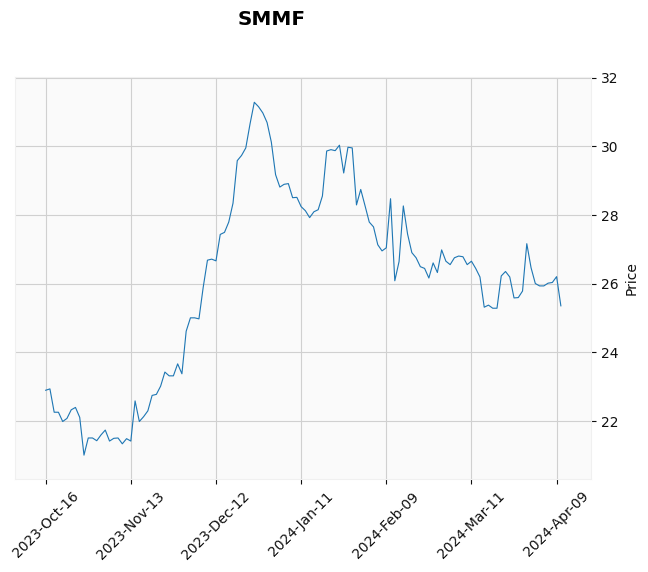

[*********************100%%**********************]  1 of 1 completed


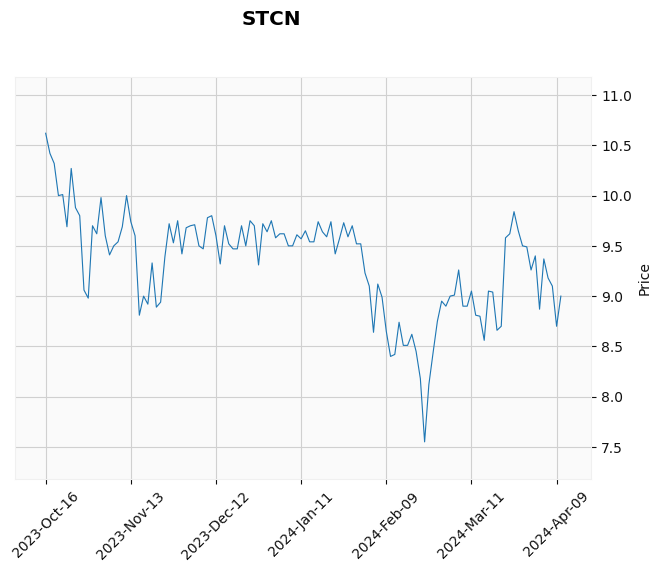

[*********************100%%**********************]  1 of 1 completed


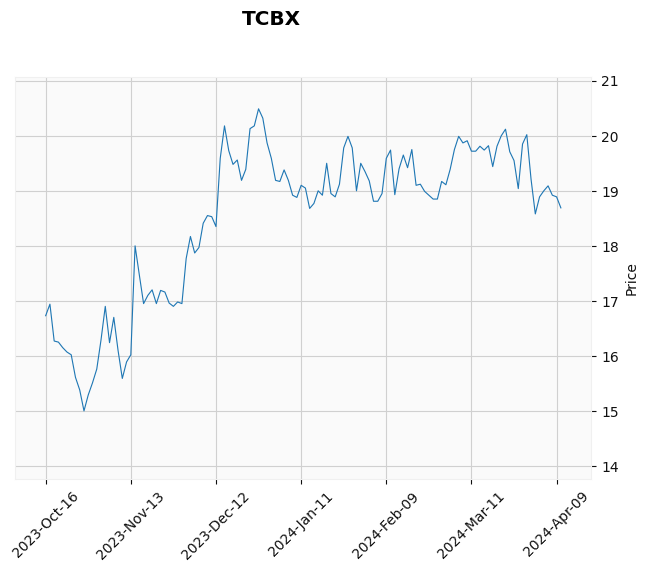

[*********************100%%**********************]  1 of 1 completed


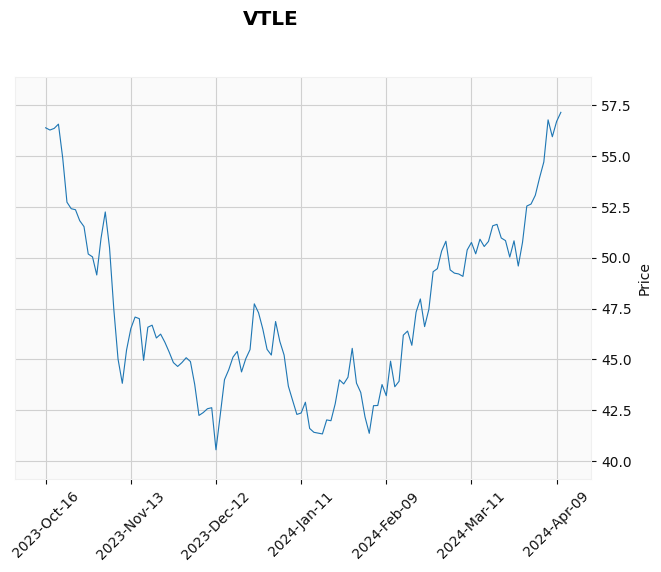

[*********************100%%**********************]  1 of 1 completed


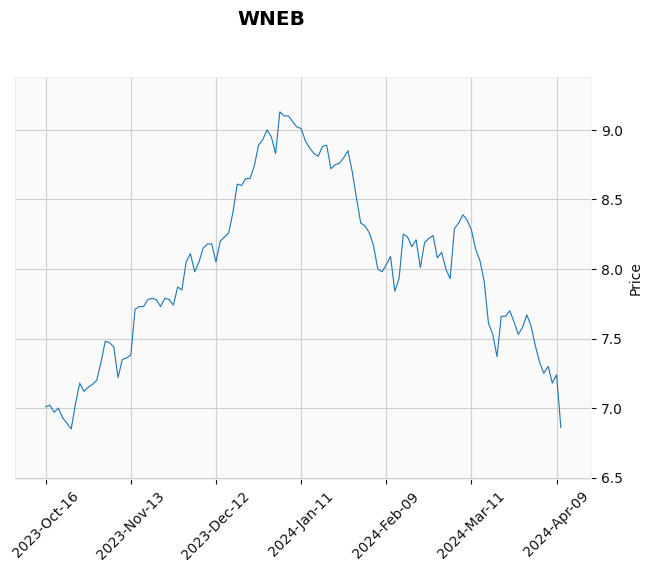

In [66]:
import datetime
import pandas as pd
import yfinance as yf
import mplfinance as mpf

def plot_line_chart(data, ticker_symbol):
    # Plot line chart
    mpf.plot(data, type='line', style='yahoo', title=ticker_symbol)

# Read overview.csv into DataFrame
df = pd.read_csv('out/overview.csv')

# Extract tickers from the 'Ticker' column
tickers = df['Ticker']
company = df['Company']

# Iterate through each stock ticker in the DataFrame
for ticker_symbol in tickers:
    # Calculate start date as 180 days before the current date
    end_date = datetime.datetime.now().date()
    start_date = end_date - datetime.timedelta(days=180)
    
    # Get historical stock price data
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    
    # Plot line chart for each stock
    plot_line_chart(data, ticker_symbol)

